In [3]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

#Load data file
aug_test = "Data Files/aug_test.csv"

#Read August Data and store into DataFrame
August_Test = pd.read_csv(aug_test)

In [4]:
# View Data Headers for August Test File
August_Test_df = pd.read_csv(aug_test)
August_Test_df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [5]:
#Load August Train Data File
aug_train = "Data Files/aug_train.csv"

# View Data Headers for August Train File 
August_Train_df = pd.read_csv(aug_train)
August_Train_df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [6]:
#Load Sample Submission Sample Data File
sample_submission = "Data Files/sample_submission.csv"

# View Data Headers for Sample Submission File
Sample_Submission_df = pd.read_csv(sample_submission)
Sample_Submission_df.head()

,enrollee_id,target
0,32403,0.5
1,9858,0.5
2,31806,0.5
3,27385,0.5
4,27724,0.5


In [7]:
# create a sample dataframe with x amount of random rows

august_sample_df = August_Train_df.sample(1000)




In [8]:
# use dropna to remove rows with imcomplete data (Nan values) from dataframe

dropped_df = august_sample_df.dropna()
dropped_df

# reset index of dropped df for enrolee id
dropped_df.reset_index(inplace=True)
del dropped_df['index']
dropped_df.head()




,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,19534,city_71,0.884,Male,No relevent experience,no_enrollment,Masters,STEM,6,10/49,Pvt Ltd,3,6,0.0
1,14214,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,18,10000+,Pvt Ltd,2,12,0.0
2,31505,city_27,0.848,Male,Has relevent experience,no_enrollment,Graduate,STEM,10,100-500,Pvt Ltd,1,80,0.0
3,13285,city_41,0.827,Male,Has relevent experience,Part time course,Graduate,STEM,>20,50-99,Pvt Ltd,>4,118,0.0
4,6394,city_73,0.754,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,500-999,Pvt Ltd,2,30,0.0


In [9]:
# check sample dataframe for duplicate enrollee_id

# Get the total number of enrollee
id_value = dropped_df["enrollee_id"].value_counts()
id_value_count = len(id_value)
id_value_count

# Getting the duplicate mice by ID number that shows up for enrollee ID.
dupe_enrollee = dropped_df.loc[dropped_df.duplicated
                                    (subset='enrollee_id'),'enrollee_id'].unique()

#print "there are x enrolees and y duplicates"
print(f'There are {id_value_count} enrollees and {dupe_enrollee} duplicates.')

There are 496 enrollees and [] duplicates.


In [10]:
# use dropped_df to perform test analysis


# Interpret model(s) such a way that illustrate which features affect candidate decision
    # Is there a correlation between years of experience, training hours and interest in a new job?
    # Is there correlation between education level or college major and successful completion of training?
    # Is there a gap in training hours based on gender?
# Predict the probability of a candidate will work for the company

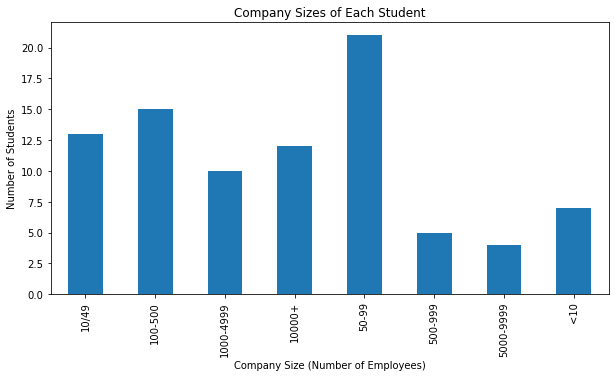

company_size
10/49        13.0
100-500      15.0
1000-4999    10.0
10000+       12.0
50-99        21.0
500-999       5.0
5000-9999     4.0
<10           7.0
Name: target, dtype: float64

In [43]:
# Generate a bar plot showing the company sizes of the target employee using pandas.
cs = dropped_df.groupby(["company_size"]).sum()["target"]
cs.plot(kind="bar", figsize=(10,5))

plt.title("Company Sizes of Each Student")
plt.xlabel("Company Size (Number of Employees)")
plt.ylabel("Number of Students")

plt.show()
cs

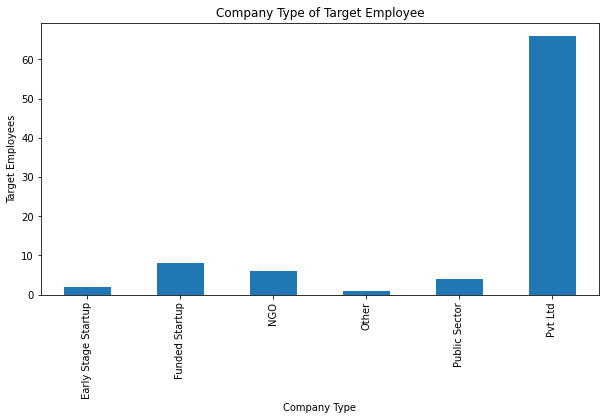

company_type
Early Stage Startup     2.0
Funded Startup          8.0
NGO                     6.0
Other                   1.0
Public Sector           4.0
Pvt Ltd                66.0
Name: target, dtype: float64

In [41]:
# Generate a bar plot showing the company type of the target trainees using pandas.
ct = dropped_df.groupby(['company_type']).sum()['target']
ct.plot(kind="bar", figsize=(10,5))
plt.title("Company Type of Target Employee")
plt.xlabel("Company Type")
plt.ylabel("Target Employees")

plt.show()
ct

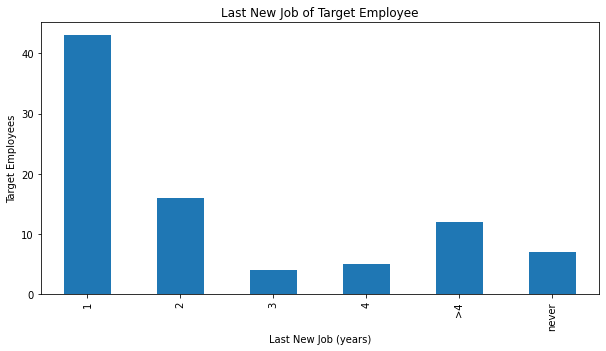

last_new_job
1        43.0
2        16.0
3         4.0
4         5.0
>4       12.0
never     7.0
Name: target, dtype: float64

In [39]:
# Generate a bar plot showing the last new job of the target trainees using pandas.
lnj = dropped_df.groupby(['last_new_job']).sum()['target']
lnj.plot(kind="bar", figsize=(10,5))
plt.title("Last New Job of Target Employee")
plt.xlabel("Last New Job (years)")
plt.ylabel("Target Employees")

plt.show()
lnj